In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Necissary Calibration

### Part 1: Magnetic Field

In [4]:
# B(z) measurement inside the coil at I = 1.00 A

# Load Data
data_Bz = np.loadtxt('../resources/data/calibration_B_z.csv', delimiter=',', skiprows=1)
B_z = data_Bz.T

B_err = 0.1 #mT


data_BI = np.loadtxt('../resources/data/calibration_B_I.csv', delimiter=',', skiprows=1)
B_I = data_BI.T

#### Task 2: B(z)

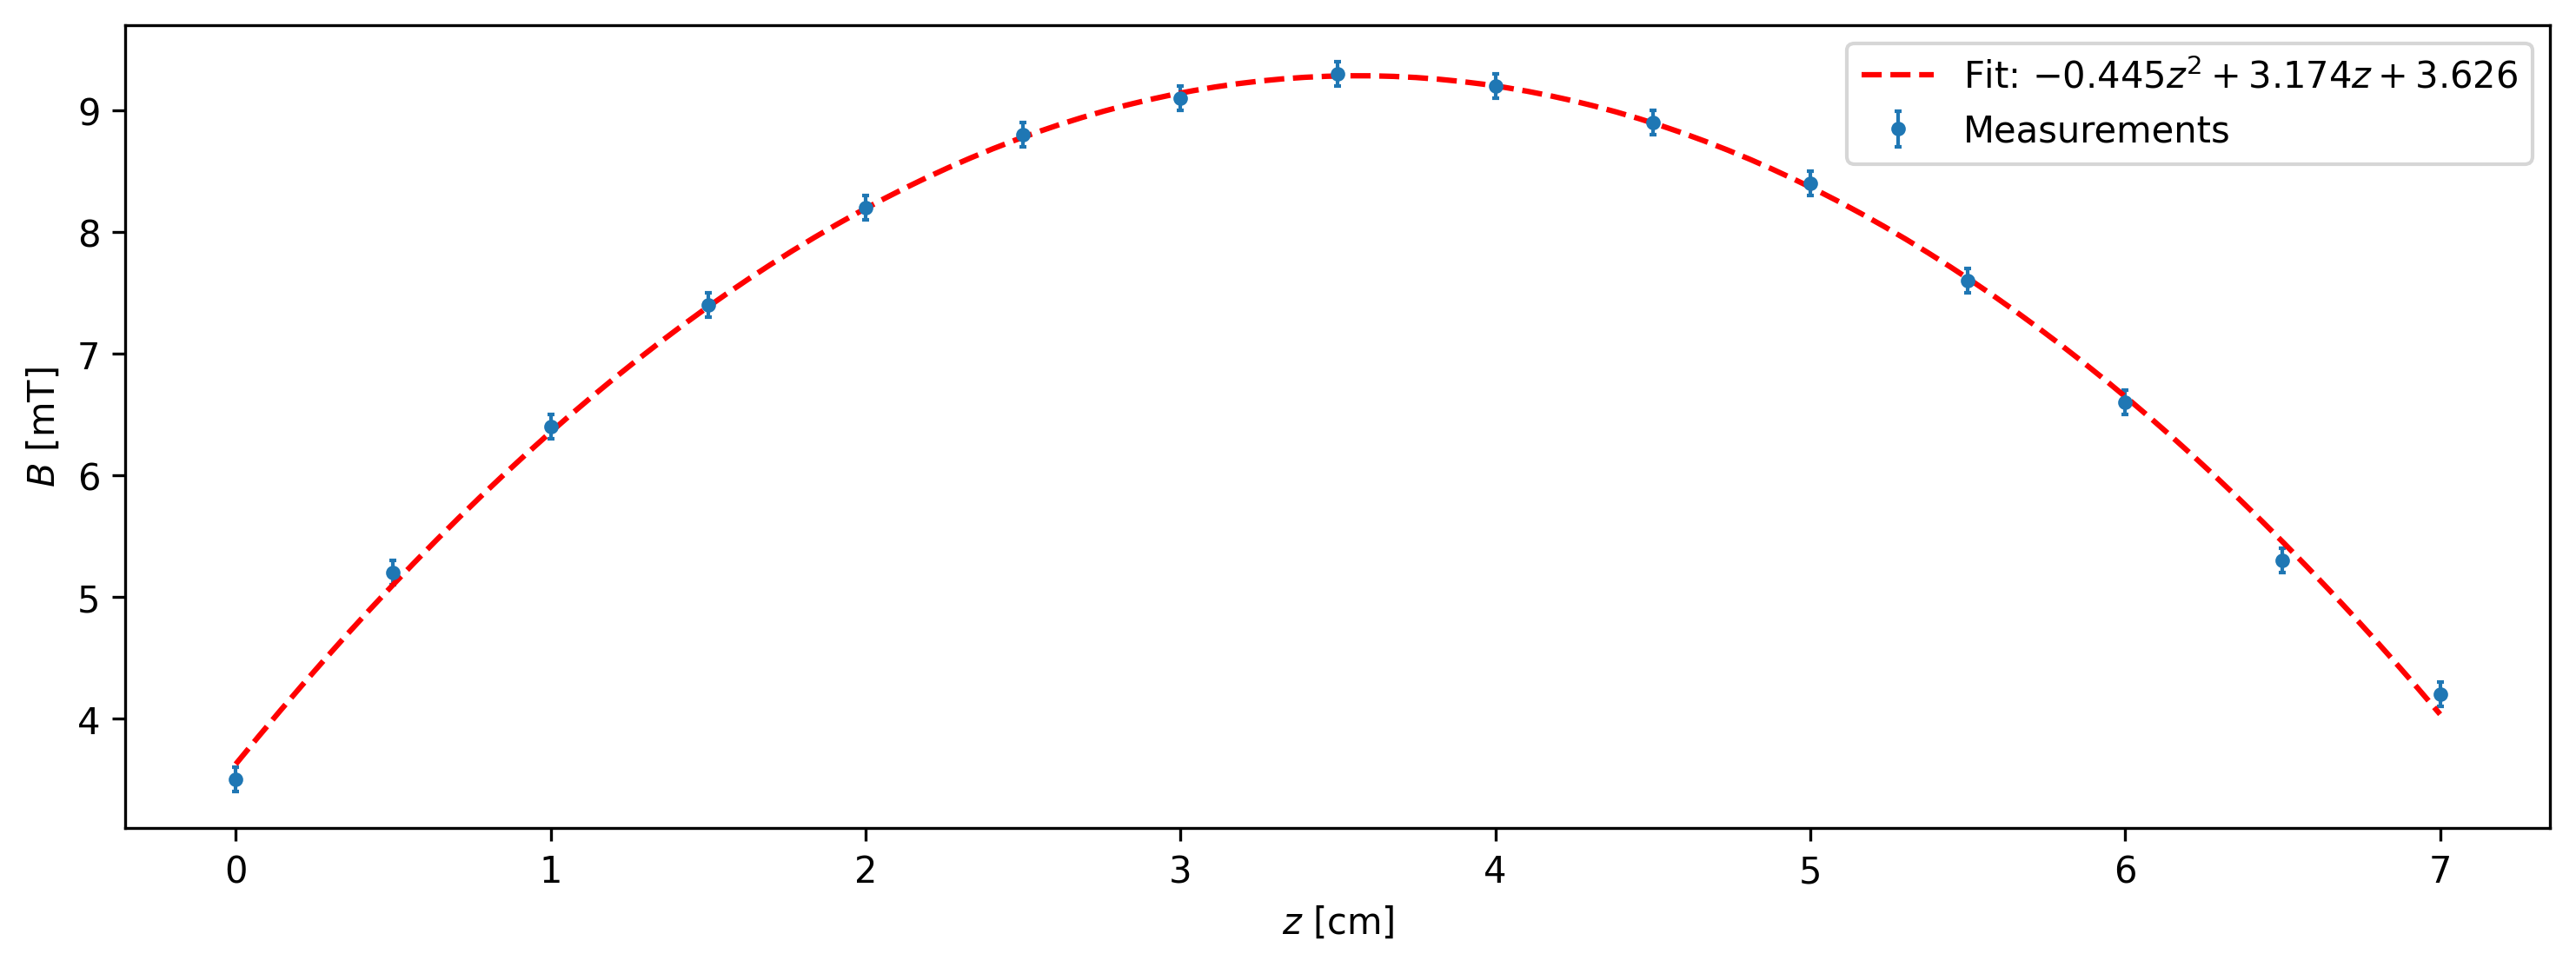

In [18]:
figure, ax = plt.subplots(figsize=(12,4), dpi=300)

ax.errorbar(B_z[0],B_z[1],yerr=B_err, fmt='.', capsize=1, elinewidth=1, label='Measurements')
ax.set(xlabel='$z$ [cm]',ylabel='$B$ [mT]')

# 1. Calculate the Coefficients (a*z^2 + b*z + c)
coeffs = np.polyfit(B_z[0], B_z[1], 2)
y_fit = np.poly1d(coeffs)

# 2. Plot the fitted curve
x_fit = np.linspace(0, 7, 100)
ax.plot(x_fit, y_fit(x_fit), 'r--', label=f'Fit: ${coeffs[0]:.3f}z^2 + {coeffs[1]:.3f}z + {coeffs[2]:.3f}$')
ax.legend()

In [19]:
import scipy.integrate as integrate

B_avg_integ = integrate.quad(lambda x: y_fit(x),0,7)
B_avg_integ =np.round(np.array(B_avg_integ)[0]/7, decimals=2)
print('B_avg_integ = ',B_avg_integ ,'+-',0.3,'mT', )

B_avg_integ =  7.47 +- 0.3 mT


In [20]:
B_avg_sum = 0.5*np.sum(B_z[1])/7
print('B_avg_sum = ',np.round(np.array(B_avg_sum), decimals=2),'+-',0.3,'mT', )

B_avg_sum =  7.72 +- 0.3 mT


In [21]:
# B_Ampl

B_Ampl_integ = B_avg_integ*np.sqrt(2)
B_Ampl_sum = B_avg_sum*np.sqrt(2)

print('B_Ampl_integ = ',np.round(np.array(B_Ampl_integ), decimals=2),'+-',0.42,'mT', )
print('B_Ampl_sum = ',np.round(np.array(B_Ampl_sum), decimals=2),'+-',0.42,'mT', )


B_Ampl_integ =  10.56 +- 0.42 mT
B_Ampl_sum =  10.92 +- 0.42 mT


#### Task 3: B(I)

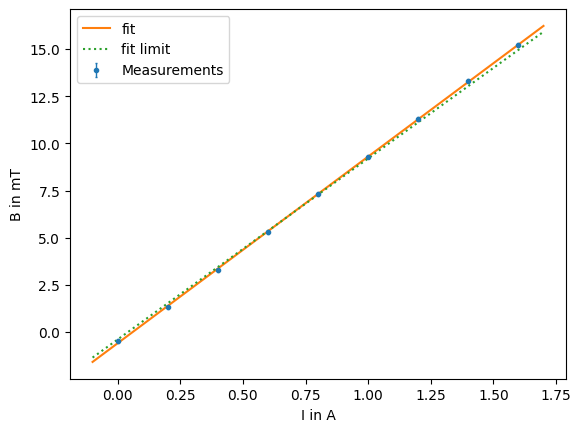

In [22]:
# Calibration curve B = f(I)

plt.errorbar(B_I[0],B_I[1],yerr=B_err, fmt='.', capsize=1, elinewidth=1, label='Measurements')# xerr=0.01, line_style='dashed' )
plt.ylabel('B in mT')
plt.xlabel('I in A')

# Manual fit:
x_fit = np.linspace(-0.1,1.7,100)
def y_fit(x):
    return -0.6 + x*9.9
plt.plot(x_fit,y_fit(x_fit),'-', label='fit')

def y_fit_grenz(x):
    return -0.4 + x*9.6
plt.plot(x_fit,y_fit_grenz(x_fit),':', label='fit limit')

plt.legend()

$\rightarrow B(I) = [-0.6 \pm 0.2] + I \cdot [9.9 \pm 0.3] \: mT$

Amplitude of B with AC ($\times \sqrt{2}$):


$\rightarrow B_{AC Ampl}(I) = [-0.8 \pm 0.3] + I \cdot [14.0 \pm 0.5] \: mT$


### Part 2:

#### Task 5: Malus-Law, contrast and gspot without Glass

In [23]:
# Load data

data_malus_air = np.loadtxt('../resources/data/malus_without_glass_I_phi.csv', delimiter=',', skiprows=1)
I_phi_air = data_malus_air.T

I_B = 0.012

<>:4: SyntaxWarning: "\p" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\p"? A raw string is also an option.
<>:4: SyntaxWarning: "\p" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\p"? A raw string is also an option.
/tmp/ipykernel_313344/2842436814.py:4: SyntaxWarning: "\p" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\p"? A raw string is also an option.
  ax.set(xlabel='$\phi$ [\degree]', ylabel='$I$ [mA]')


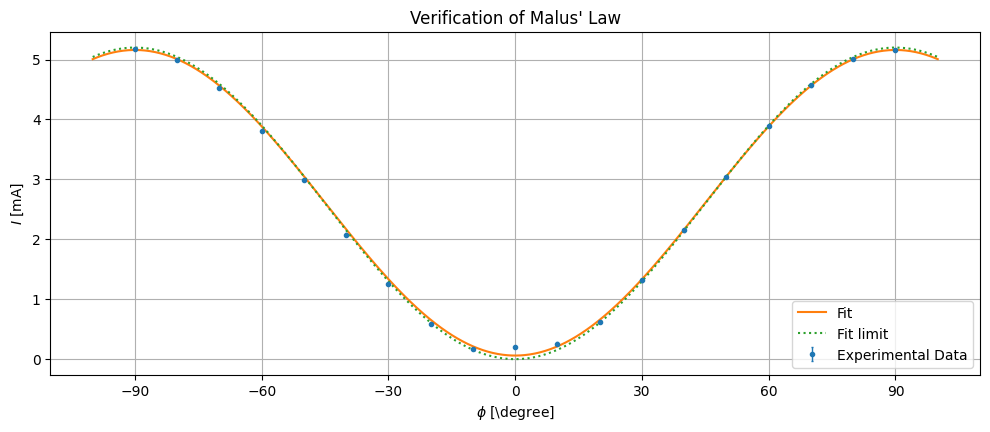

RESULTS:
$I_{\parallel}$ 5.18 +- 0.04
$I_{\perp}$ 0.17 +- 0.06
G-spot: G= 30.29 +- 10.63
Contrast: K= 0.94 +- 0.01


In [27]:

figure, ax = plt.subplots(figsize=(10., 4.2))

ax.errorbar(I_phi_air[0],I_phi_air[1],yerr=0.02, fmt='.', capsize=1, elinewidth=1, label='Experimental Data')
ax.set(xlabel='$\phi$ [\degree]', ylabel='$I$ [mA]')

# Manual fit cos(phi):
x_fit = np.linspace(-100,100,1000)
def y_fit(x):
    x = x*2*np.pi/360
    return 5.1*np.cos(x+np.pi/2)**2 + 0.06
plt.plot(x_fit,y_fit(x_fit),'-', label='Fit')

def y_fit_grenz(x):
    x = x*2*np.pi/360
    return 5.2*np.cos(x+np.pi/2)**2+0
plt.plot(x_fit,y_fit_grenz(x_fit),':', label='Fit limit')

plt.xticks(np.linspace(-90,90,7))
plt.tight_layout()
plt.grid(True)
plt.legend(loc=4)
plt.title('Verification of Malus\' Law')
plt.show()

I_par = np.max(y_fit(x_fit))
I_par = np.max(I_phi_air[1])
I_par_err = np.abs(np.max(y_fit_grenz(x_fit)) - np.max(y_fit(x_fit)))

I_ort = np.min(y_fit(x_fit))
I_ort = np.min(I_phi_air[1])
I_ort_err = np.abs(np.min(y_fit_grenz(x_fit)) - np.min(y_fit(x_fit)))

K = (I_par - I_ort)/(I_par + I_ort)
K_err = 2/(I_par+ I_ort)**2 * np.sqrt((I_par*I_par_err)**2+(I_ort*I_ort_err)**2)

G = I_par/I_ort
G_err = G*np.sqrt((I_ort_err/I_ort)**2+(I_par_err/I_par)**2)

print('\033[1m'+'RESULTS:'+'\033[0m')
print(r'$I_{\parallel}$',np.round(I_par,2),'+-',np.round(np.abs(I_par_err),2))
print(r'$I_{\perp}$',np.round(I_ort,2),'+-',np.round(np.abs(I_ort_err),2))
print('G-spot: G=',np.round(G,2),'+-',np.round(np.abs(G_err),2))
print('Contrast: K=',np.round(K,2),'+-',np.round(np.abs(K_err),2))


#### Task 6: Contrast, G-spot, Malus-slope with Glass

In [ ]:
# Load data

data_malus_glass = np.loadtxt('malus_with_glass.csv', delimiter=',', skiprows=1)
I_phi_glass = data_malus_glass.T

I_B = 0.012

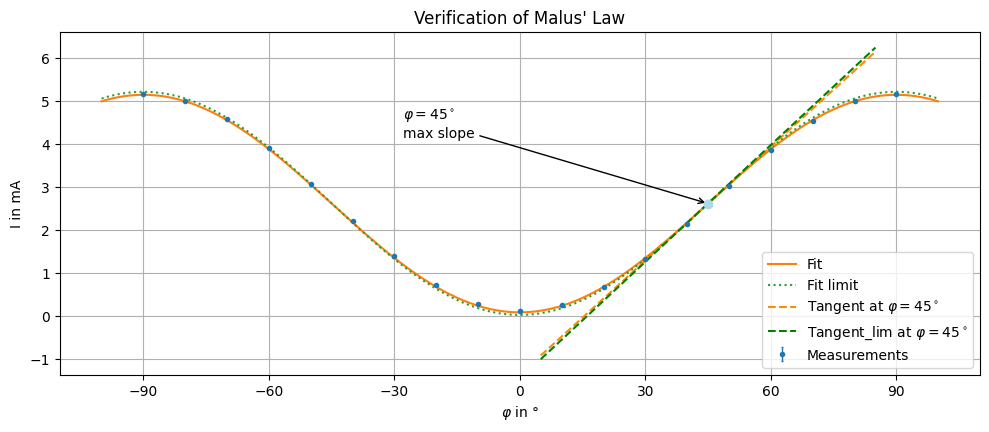

RESULTS:
$I_{\parallel}$ 5.17 +- 0.07
$I_{\perp}$ 0.11 +- 0.06
G-spot: G= 45.75 +- 24.3
Contrast: K= 0.96 +- 0.03 

dI/dphi = 5.07 +- 0.13 mA/°


In [203]:
plt.figure(figsize=(10., 4.2))
plt.errorbar(I_phi[0],I_phi[1],yerr=0.01, fmt='.', capsize=1, elinewidth=1, label='Measurements')# xerr=0.01, line_style='dashed' )
plt.ylabel(r'I in mA')
plt.xlabel(r"$\varphi$ in °")

# Manual fit cos(phi):

I0_fit = 5.07
I0_fit_grenz = 5.2


x_fit = np.linspace(-100,100,1000)
def y_fit(x):
    x = x*2*np.pi/360
    return I0_fit*np.cos(x+np.pi/2)**2 + 0.08
plt.plot(x_fit,y_fit(x_fit),'-', label='Fit')

def y_fit_grenz(x):
    x = x*2*np.pi/360
    return I0_fit_grenz*np.cos(x+np.pi/2)**2+0.02
plt.plot(x_fit,y_fit_grenz(x_fit),':', label='Fit limit')

#----------------- Insertion of code for the slope at 45° ------------------#

# Tangential fit at 45°
phi_deg = x_fit

phi0_deg = 45.0
I_wp = I0_fit * np.cos(np.deg2rad(phi0_deg))**2 +0.08
I_wp_grenz = I0_fit_grenz * np.cos(np.deg2rad(phi0_deg))**2 +0.02

# Derivative: d/dphi [I0 cos^2(phi)] = -I0 sin(2phi), with phi in radians
slope_per_rad = I0_fit * np.sin(2 * np.deg2rad(phi0_deg))  # = -I0 at 45°
slope_per_rad_grenz = I0_fit_grenz * np.sin(2 * np.deg2rad(phi0_deg))  # = -I0 at -45°

# Tangent line around 45°
phi_tan_deg = np.linspace(phi0_deg-40, phi0_deg+40, 250)
I_tan = I_wp + slope_per_rad * np.deg2rad(phi_tan_deg - phi0_deg)
I_tan_grenz = I_wp_grenz + slope_per_rad_grenz * np.deg2rad(phi_tan_deg - phi0_deg)

plt.plot(phi_tan_deg, I_tan, "--", label=r"Tangent at $\varphi=45^\circ$", color='darkorange')

plt.plot(phi_tan_deg, I_tan_grenz, "--", label=r"Tangent_lim at $\varphi=45^\circ$", color='green')


# Mark and annotate working point
plt.scatter([phi0_deg], [I_wp], zorder=5, color='lightblue')
plt.annotate(
    r"$\varphi=45^\circ$" "\n" r"max slope",
    xy=(phi0_deg, I_wp),
    xytext=(-28, 0.82 * I0_fit),
    arrowprops=dict(arrowstyle="->"),
    fontsize=10
)



#----------------------- end of Insertion ----------------------------------#

plt.xticks(np.linspace(-90,90,7))
plt.tight_layout()
plt.grid(True)
plt.legend(loc=4)
plt.title('Verification of Malus\' Law')
plt.show()

I_par = np.max(y_fit(x_fit))
I_par = np.max(I_phi[1])
I_par_err = np.abs(np.max(y_fit_grenz(x_fit)) - np.max(y_fit(x_fit)))

I_ort = np.min(y_fit(x_fit))
I_ort = np.min(I_phi[1])
I_ort_err = np.abs(np.min(y_fit_grenz(x_fit)) - np.min(y_fit(x_fit)))

K = (I_par - I_ort)/(I_par + I_ort)
K_err = 2/(I_par+ I_ort)**2 * np.sqrt((I_par*I_par_err)**2+(I_ort*I_ort_err)**2)

G = I_par/I_ort
G_err = G*np.sqrt((I_ort_err/I_ort)**2+(I_par_err/I_par)**2)

print('\033[1m'+'RESULTS:'+'\033[0m')
print(r'$I_{\parallel}$',np.round(I_par,2),'+-',np.round(np.abs(I_par_err),2))
print(r'$I_{\perp}$',np.round(I_ort,2),'+-',np.round(np.abs(I_ort_err),2))
print('G-spot: G=',np.round(G,2),'+-',np.round(np.abs(G_err),2))
print('Contrast: K=',np.round(K,2),'+-',np.round(np.abs(K_err),2),'\n')

print('dI/dphi =', np.round(slope_per_rad,2), '+-', np.round(np.abs(slope_per_rad-slope_per_rad_grenz),2),'mA/°')


#### Task 8: Modulation of Magnetic Field

In [208]:
# Measurement Data:

I_ss = np.array([
  [30, 35, 38, 40, 42, 43, 44, 45, 46, 47, 48, 50, 52, 55, 60], # phi
  [33.0, 36.0, 38.4, 39.0, 40.0, 40.0, 40.2, 40.4, 40.4, 40.4, 40.2, 39.8, 39.2, 37.8, 35.2] # I_ss
]) 
I_ss_err = 0.1

COM: 45.731764705882355


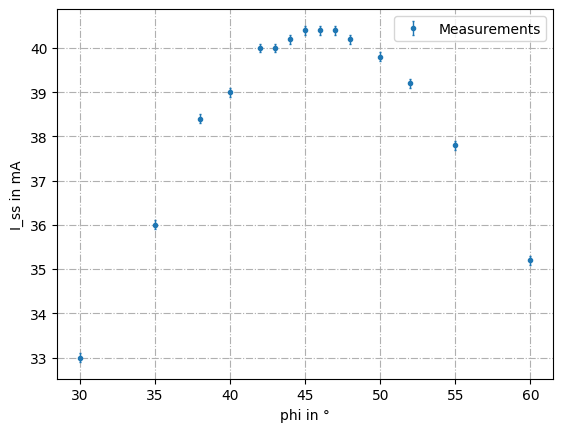

In [ ]:
# Maximal Modulation signal plot

plt.errorbar(I_ss[0],I_ss[1],yerr=I_ss_err, fmt='.', capsize=1, elinewidth=1, label='Measurements')# xerr=0.01, line_style='dashed' )
plt.ylabel('I_ss in mA')
plt.xlabel('phi in °')

# Manual fit:
x_fit = np.linspace(30,60,200)
def y_fit(x):
    return 40.45*np.cos(1.6*np.deg2rad(x-46))**2#40.5 -0.03*(x-45)**2
#plt.plot(x_fit,y_fit(x_fit),'-', label='fit')

def y_fit_grenz(x):
    return -0.4 + x*9.6
#plt.plot(x_fit,y_fit_grenz(x_fit),':', label='fit limit')

plt.grid(True,ls='-.')
plt.legend()

# Center of Mass:

phi_max = np.sum(I_ss[0,:]*(I_ss[1,:]-np.min(I_ss[1])))/np.sum((I_ss[1,:]-np.min(I_ss[1])))

phi_max = np.sum(I_ss[0,:]*(I_ss[1,:]-np.min(I_ss[1])))/np.sum((I_ss[1,:]-np.min(I_ss[1])))
print('COM:',phi_max)

## Determination of Verdet-constant:

## Code snippets:

In [ ]:
# Tangential fit at 45°
phi_deg = x_fit
I0_fit = 5.18
I0_fit_grenz = 4.95

phi0_deg = -45.0
I_wp = I0_fit * np.cos(np.deg2rad(phi0_deg))**2
I_wp_grenz = I0_fit_grenz * np.cos(np.deg2rad(phi0_deg))**2 +0.15

# Derivative: d/dphi [I0 cos^2(phi)] = -I0 sin(2phi), with phi in radians
slope_per_rad = I0_fit * np.sin(2 * np.deg2rad(phi0_deg))  # = -I0 at 45°
slope_per_rad_grenz = I0_fit_grenz * np.sin(2 * np.deg2rad(phi0_deg))  # = -I0 at -45°

# Tangent line around 45°
phi_tan_deg = np.linspace(-80, -15, 250)
I_tan = I_wp + slope_per_rad * np.deg2rad(phi_tan_deg - phi0_deg)
I_tan_grenz = I_wp_grenz + slope_per_rad_grenz * np.deg2rad(phi_tan_deg - phi0_deg)

plt.plot(phi_tan_deg, I_tan, "--", label=r"Tangent at $\varphi=45^\circ$", color='darkorange')

plt.plot(phi_tan_deg, I_tan_grenz, "--", label=r"Tangent_lim at $\varphi=45^\circ$", color='green')


# Mark and annotate working point
plt.scatter([phi0_deg], [I_wp], zorder=5, color='lightblue')
plt.annotate(
    r"$\varphi=45^\circ$" "\n" r"max slope",
    xy=(phi0_deg, I_wp),
    xytext=(-28, 0.82 * I0_fit),
    arrowprops=dict(arrowstyle="->"),
    fontsize=10
)


print('Slope_max =', np.round(slope_per_rad,2), '+-', np.round(np.abs(slope_per_rad-slope_per_rad_grenz),2))